In [1]:
import numpy as numpy
import pandas as pandas
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [2]:
datafile = pandas.read_csv('XRP_USD_2018-06-01_2021-05-09-CoinDesk.csv')

In [3]:
datafile.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,XRP,2018-06-01,0.609705,0.616405,0.618404,0.607282
1,XRP,2018-06-02,0.617604,0.614872,0.621169,0.608681
2,XRP,2018-06-03,0.643043,0.624189,0.650921,0.618503
3,XRP,2018-06-04,0.667634,0.644291,0.677069,0.640769
4,XRP,2018-06-05,0.669680,0.690562,0.706326,0.643054
5,XRP,2018-06-06,0.679071,0.669675,0.683567,0.644431
6,XRP,2018-06-07,0.673526,0.674496,0.681372,0.655209
7,XRP,2018-06-08,0.677268,0.673526,0.687024,0.670569
8,XRP,2018-06-09,0.673248,0.677268,0.679130,0.658459
9,XRP,2018-06-10,0.657830,0.673248,0.679408,0.656040


In [4]:
datafile.shape

(1073, 6)

In [5]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             1073 non-null   object 
 1   Date                 1073 non-null   object 
 2   Closing Price (USD)  1073 non-null   float64
 3   24h Open (USD)       1073 non-null   float64
 4   24h High (USD)       1073 non-null   float64
 5   24h Low (USD)        1073 non-null   float64
dtypes: float64(4), object(2)
memory usage: 50.4+ KB


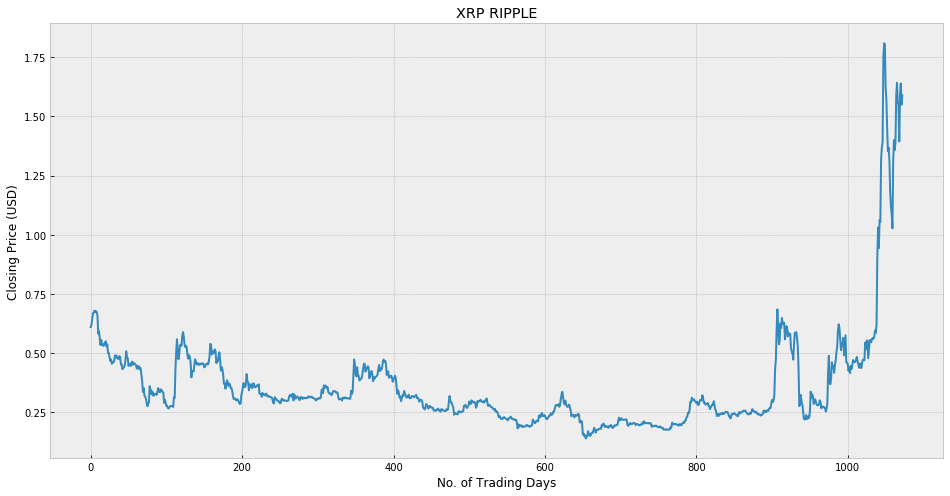

In [6]:
plt.figure(figsize = (16,8))
plt.title('XRP RIPPLE')
plt.xlabel('No. of Trading Days')
plt.ylabel('Closing Price (USD)')
plt.plot(datafile['Closing Price (USD)'])
plt.show()

In [7]:
datafile = datafile[['Closing Price (USD)']]
datafile.head(5)

,Closing Price (USD)
0,0.609705
1,0.617604
2,0.643043
3,0.667634
4,0.669680


In [8]:

future_days = 25
datafile['Prediction'] = datafile[['Closing Price (USD)']].shift(-future_days)

datafile.tail(30)

,Closing Price (USD),Prediction
1043,1.055027,1.394571
1044,1.318441,1.590046
1045,1.369254,1.639602
1046,1.391165,1.550022
1047,1.751073,1.589197
1048,1.809823,NaN
1049,1.803770,NaN
1050,1.619674,NaN
1051,1.571928,NaN
1052,1.449742,NaN


In [9]:
X = numpy.array(datafile.drop(['Prediction'], 1))[: -future_days]
print(X)

[[0.60970513]
 [0.61760373]
 [0.64304263]
 ...
 [1.36925428]
 [1.39116489]
 [1.75107337]]


In [10]:
y = numpy.array(datafile['Prediction'])[: -future_days]
print(y)

[0.48107    0.46608214 0.4722437  ... 1.63960172 1.55002171 1.5891965 ]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:

#Creating Models
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

In [13]:
x_future = datafile.drop(['Prediction'], 1)[: -future_days]
x_future = x_future.tail(future_days)
x_future = numpy.array(x_future)
x_future

array([[0.54418449],
       [0.51679271],
       [0.55186093],
       [0.5527799 ],
       [0.47805564],
       [0.51447822],
       [0.55374547],
       [0.55536841],
       [0.54570984],
       [0.56097702],
       [0.56364943],
       [0.56020151],
       [0.56980675],
       [0.59530606],
       [0.58485476],
       [0.62311959],
       [0.90178786],
       [1.0305886 ],
       [0.94340872],
       [1.06189036],
       [1.05502732],
       [1.31844141],
       [1.36925428],
       [1.39116489],
       [1.75107337]])

In [14]:
# Decision Tree and Linear Regression Models Prediction Setup
tree_prediction = tree.predict(x_future)
print(tree_prediction)

print()
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)


[1.80982302 1.80377009 1.61967392 1.57192842 1.44974215 1.35292787
 1.57192842 1.31183702 1.18005662 1.11864403 0.46125068 1.02706564
 1.31259971 1.40025292 1.35777024 0.27538941 1.59116154 1.39457052
 1.5570242  1.39457052 1.39457052 1.59004603 1.55002171 1.55002171
 1.55002171]


[0.56876985 0.54121176 0.5764929  0.57741744 0.50223949 0.53888321
 0.57838887 0.58002167 0.57030446 0.58566434 0.58835297 0.58488412
 0.59454767 0.6202018  0.60968705 0.6481842  0.92854441 1.05812717
 0.97041798 1.08961899 1.08271427 1.34772769 1.39884907 1.42089271
 1.78298639]


ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


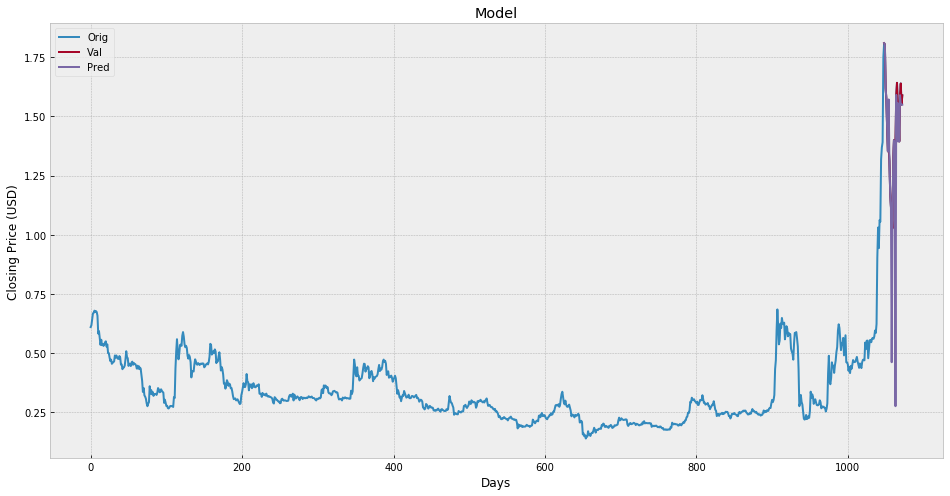

In [15]:
predictions = tree_prediction

valid = datafile[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price (USD)')
plt.plot(datafile['Closing Price (USD)'])
plt.plot(valid[['Closing Price (USD)', 'Prediction']])
plt.legend(['Orig', 'Val' , 'Pred'])
plt.show()

ipykernel_launcher:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


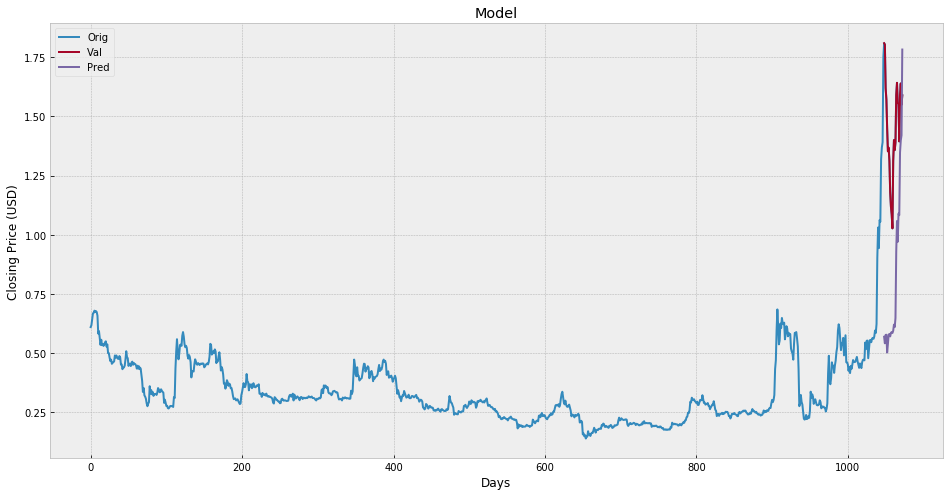

In [16]:
predictions = lr_prediction

valid = datafile[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price (USD)')
plt.plot(datafile['Closing Price (USD)'])
plt.plot(valid[['Closing Price (USD)', 'Prediction']])
plt.legend(['Orig', 'Val' , 'Pred'])
plt.show()